In [8]:
from PIL import Image, ImageDraw

# Create sample image
img = Image.new('RGB', (300, 300), color='white')
draw = ImageDraw.Draw(img)
draw.ellipse((50, 50, 250, 250), fill='red', outline='black')
img.save("monarch_input.png")
print("PNG image created: monarch_input.png")


PNG image created: monarch_input.png


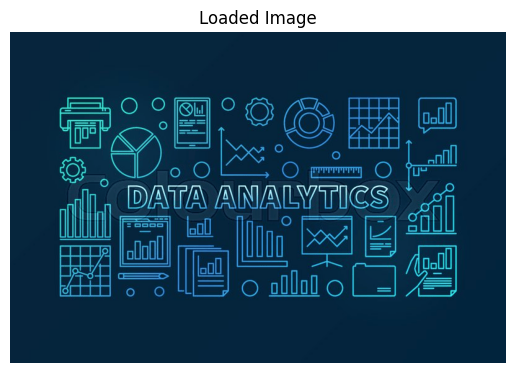

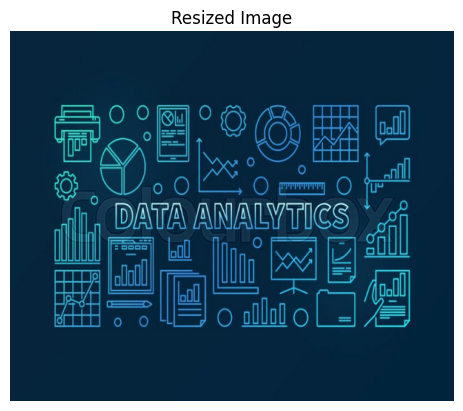

Encrypted HEX: 0eae7742ec7ed24c1624528c3c513e48a165001a9f92934452009cefd1ec7b10


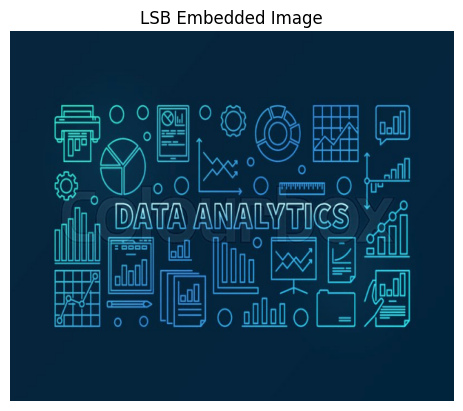

Decrypted Message: This is a secret message
No module named 'pyopencl'
MSE: 0.00027666666
PSNR: 83.71123523211487
SSIM: 0.9999952889987781


In [9]:
# 1. Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Hash import SHA256
from PIL import Image
from SSIM_PIL import compare_ssim
import warnings
warnings.filterwarnings("ignore")

# 2. Load Image
img = cv2.imread("output.png")
if img is None:
    raise Exception("Image not found!")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.title("Loaded Image")
plt.show()

# 3. Resize
resized = cv2.resize(img, (600, 500)).astype(np.uint8)
plt.imshow(resized)
plt.axis("off")
plt.title("Resized Image")
plt.show()

# 4. AES Encryption of text
message = "This is a secret message"
hash_obj = SHA256.new()
key = hash_obj.digest()
BLOCK = 16
PAD = "{"
def pad(s): return s + (BLOCK - len(s) % BLOCK) * PAD
cipher = AES.new(key, AES.MODE_ECB)
encrypted_bytes = cipher.encrypt(pad(message).encode())
hex_data = encrypted_bytes.hex()
print("Encrypted HEX:", hex_data)

# 5. LSB embedding
def lsb_encode(image, data):
    img = image.copy().astype(np.uint8)
    h, w, _ = img.shape
    bin_data = ''.join([format(ord(i), '08b') for i in data])
    idx = 0
    for i in range(h):
        for j in range(w):
            if idx < len(bin_data):
                r, g, b = img[i, j]
                r = np.uint8((int(r) & ~1) | int(bin_data[idx]))
                img[i, j] = [r, g, b]
                idx += 1
            else:
                return img
    return img

secret_img = lsb_encode(resized, hex_data)
cv2.imwrite("Output/secret_output.png", cv2.cvtColor(secret_img, cv2.COLOR_RGB2BGR))
plt.imshow(secret_img)
plt.axis("off")
plt.title("LSB Embedded Image")
plt.show()

# 6. Decryption
def lsb_decode(image, length):
    h, w, _ = image.shape
    bits = ""
    for i in range(h):
        for j in range(w):
            r, g, b = image[i, j]
            bits += str(r & 1)
            if len(bits) == length * 8:
                out = ""
                for k in range(0, len(bits), 8):
                    out += chr(int(bits[k:k+8], 2))
                return out
    return ""

revealed_hex = lsb_decode(secret_img, len(hex_data))
byte_data = bytes.fromhex(revealed_hex)
decipher = AES.new(key, AES.MODE_ECB)
pt = decipher.decrypt(byte_data).decode()
pt = pt.replace(PAD, "")
print("Decrypted Message:", pt)

# 7. PSNR / MSE / SSIM
orig = resized.astype(np.float32)
steg = secret_img.astype(np.float32)
mse = np.mean((orig - steg) ** 2)
psnr = cv2.PSNR(resized, secret_img)
ssim_value = compare_ssim(Image.fromarray(resized), Image.fromarray(secret_img))
print("MSE:", mse)
print("PSNR:", psnr)
print("SSIM:", ssim_value)


In [10]:
resized = resized.astype(np.uint8)


In [11]:
def lsb_encode(image, data):
    img = image.copy().astype(np.uint8)
    h, w, _ = img.shape
    bin_data = ''.join([format(ord(i), '08b') for i in data])
    idx = 0
    for i in range(h):
        for j in range(w):
            if idx < len(bin_data):
                r, g, b = img[i, j]
                r = np.uint8((int(r) & ~1) | int(bin_data[idx]))
                img[i, j] = [r, g, b]
                idx += 1
            else:
                return img
    return img

In [12]:
from PIL import Image, ImageDraw

# 1. Create blank image (white background)
img = Image.new('RGB', (300, 300), color='white')

# 2. Draw apple
draw = ImageDraw.Draw(img)

# Apple body (red circle)
draw.ellipse((75, 75, 225, 225), fill='red', outline='black')

# Apple leaf (green)
draw.polygon([(150, 50), (170, 70), (130, 70)], fill='green')

# Apple stem (brown)
draw.rectangle((145, 65, 155, 90), fill='brown')

# 3. Save as PNG
img.save("Tree_image.png")
print("PNG image created: apple_image.png")

# 4. Show image
img.show()


PNG image created: apple_image.png


In [26]:
from PIL import Image, ImageDraw

# Create a blank 300x300 image with white background
img = Image.new('RGB', (300, 300), color='white')
draw = ImageDraw.Draw(img)

# Draw the apple body (red circle)
draw.ellipse((75, 75, 225, 225), fill='red', outline='black')

# Draw the leaf (green triangle)
draw.polygon([(150, 50), (170, 70), (130, 70)], fill='green')

# Draw the stem (brown rectangle)
draw.rectangle((145, 65, 155, 90), fill='brown')

# Save the image as PNG
img.save("apple_image.png")
print("Apple PNG image created: apple_image.png")

# Display the image
img.show()


Apple PNG image created: apple_image.png
